# Hands-on 8: Passo 4 da Prática 01: Ruído em comunicações analógicas. 

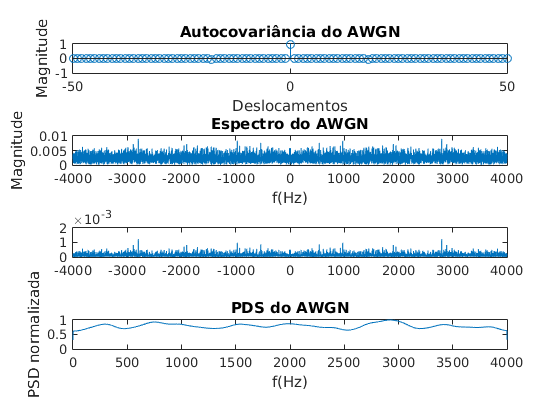

In [5]:
clc;clear all; close all;
%% AWGN real
clc;clear all;close all;
% Parâmetros
fs = 8000;
SNR_db = 10;                              % Determina o valor da SNR em dB
t = 0:0.001:5;                            % Eixo do tempo
%x=2*cos(2*pi*10*t);                       % Sinal qualquer x(t)
x=ones(length(t),1);
%% Gerar ruído com a função awgn.m
y =  awgn(x,SNR_db,'measured');
%
% Estimação da SNR pelas amostras do sinal geradas pela função awgn.m
n = y-x;
varia = var(n);
desvio = std(n);
media = mean(n);

%% AUTOCOVARIÂNCIA NOMALIZADA

subplot(4,1,1);
[Cxx,lags] = xcov(n,50,'coeff');
stem(lags,Cxx)
title('Autocovariância do AWGN');
ylabel('Magnitude');
xlabel('Deslocamentos');
%% Espectro do sinal AWGN

NFFT = 8096;                              % Comprimento da fft (Arbitrário)
freq = (-fs/2:fs/NFFT:fs/2-fs/NFFT);      % Eixo de frequência 
subplot(4,1,2);
Nfft  = fft(n,NFFT)/NFFT;                 % Calcula a FFT do AWGN
N_sig = fftshift(Nfft);   
plot(freq ,abs(N_sig));
title('Espectro do AWGN');
ylabel('Magnitude');
xlabel('f(Hz)');
%
%% Densidade Espectral do AWGN

subplot(4,1,3);
Rxx = xcorr(n,'coeff');                     % Calcula a autocorrelação
Rfft = fft(Rxx,NFFT)/NFFT;                  % Calcula a FFT da autocorrelação para obter a PSD
R_sig = fftshift(Rfft);   
plot(freq ,abs(R_sig));

%% Outro método por onde se chegar na PSD.
subplot(4,1,4)
h = spectrum.welch;                    % Cria um estimador espectral de Welch.
HPSD = psd(h,n,'Fs',fs,'NFFT', NFFT);  % Calcula a PSD
figure(1);
plot(HPSD.Frequencies,HPSD.Data/max(HPSD.Data));
title('PDS do AWGN');
xlabel('f(Hz)');
ylabel('PSD normalizada');


Conforme obeservado nos gráficos temos que devido o fato de todos os valores do AWGN serem descorelacionados ao longo do tempo, temos uma autocovariãncia igual à zero para qualquer valor de deslocamento do tempo.

Também é possível observar atraves de seu espectro que as rais não se concentram em uma frenquência em específico, tendo a sua energia espalhada de forma aproximadamente uniforme por todo espctro como podemos observar mais claramente atrás da sua PSD.

**Para o relatório:** Estimar a SNR (dB) de um sinal x=Amcos(2πfmt), salvo no arquivo Pratica_08_sinal_real.mat e de um sinal x=Arcos(2πfmt)+j⋅Aicos(2πfmt), salvo no arquivo Pratica_08_sinal_complexo.mat, respectivamente. Os arquivos disponibilizam o sinal recebido y(t), sua frequência de amostragem fs, a amplitude Am do sinal real, sua frequência fm, as amplitudes Ar e Ai do sinal complexo.

Estimação de SNR: 
   SNR de entrada do sinal real: 31.9409 linear
   SNR de entrada do sinal real: 15.0435 dB
   SNR de entrada do sinal complexo: 10.0888 linear
   SNR de entrada do sinal complexo: 10.0384 dB


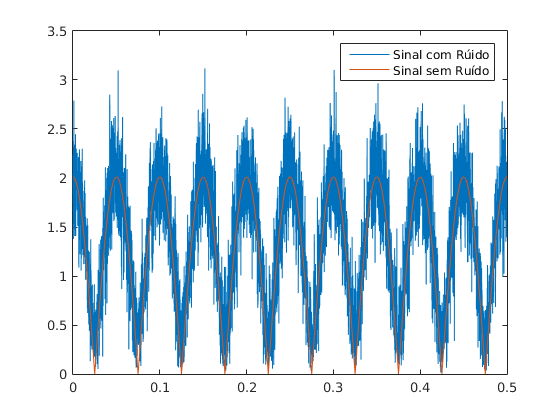

In [7]:
clc;clear all; close all;
load('/home/mateuscastelobranco/DCO2004_2019/MATERIAL/HD_08/Pratica_08_sinal_real.mat')
s=y;
load('/home/mateuscastelobranco/DCO2004_2019/MATERIAL/HD_08/Pratica_08_sinal_complexo.mat')
s_complex= y;
%% Parâmetros
fs = 10000;
fm = 10;
Am = 2;
Ai = 0.2;
Ar = 2;
t = (0:10/fs:5)*0.1;                                 % Eixo do tempo
x = Am*cos(2*pi*fm*t);                               % Sinal qualquer x(t)
x_complex = Ar*cos(2*pi*fm*t) + i*Ai*cos(2*pi*10*t); % Sinal complexo qualquer x(t)

plot(t,abs(s_complex),t,abs(x_complex));
legend('Sinal com Rúido','Sinal sem Ruído');

n = s-x;
n_complex = s_complex - x_complex;
% plot(t,abs(n_complex));

N = length(x);                            % Calcula o comprimento de x
Ps = sum(abs(x).^2)/N;                    % Calcula a potência do sinal
Pn = sum(abs(n).^2)/N;                    % Calcula a potência do ruído
SNR = Ps/Pn;                                    %SNR linear
SNR_db = 10*log10(Ps/Pn);                       %SNR em dB

N = length(x_complex);                            % Calcula o comprimento de x
Ps_complex = sum(abs(x_complex).^2)/N;            % Calcula a potência do sinal
Pn_complex = sum(abs(n_complex).^2)/N;            % Calcula a potência do ruído
SNR_complex = Ps_complex/Pn_complex;                  %SNR linear
SNR_db_complex = 10*log10(Ps_complex/Pn_complex);     %SNR em dB

% Mostrar informações
disp('Estimação de SNR: ')
disp(['   SNR de entrada do sinal real: ' num2str(SNR) ' linear']);
disp(['   SNR de entrada do sinal real: ' num2str(SNR_db) ' dB']);
disp(['   SNR de entrada do sinal complexo: ' num2str(SNR_complex) ' linear']);
disp(['   SNR de entrada do sinal complexo: ' num2str(SNR_db_complex) ' dB']);


In [ ]:
Mesmas descrições em python...